# 회귀(Regression)

지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다

- **MSE (Mean Squared Error)**
    - 실제 값과 예측값의 차의 제곱해 평균 낸 것
    - mean_squared_error() 
    - 'neg_mean_squared_error'  (MSE평가지표에 음수를 붙여서 neg로 표기)
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
    $$
- **RMSE (Root Mean Squared Error)**
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- **$R^2$ (R square, 결정계수)**
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    - r2_score()
    - 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$
    
    $$
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$
    

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_regression
# load: 이미 존재하는 예제 데이터를 끌어옴
# make: 사용자가 직접 가상 데이터 생성
X, y = make_regression(n_samples=100,  # samples: 샘플, 관측치, 데이터포인트의 수 => 행 개수
                      n_features=1,   # 컬럼 개수
                      n_informative=1,  # target을 만드는데 영향을 주는 feature의 수
                      noise=50,  # 잡음 (기본값=0), 우리가 예측할 수 없는 오류
                      random_state=1  # 난수 seed 값
                      )
X.shape, y.shape

((100, 1), (100,))

C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


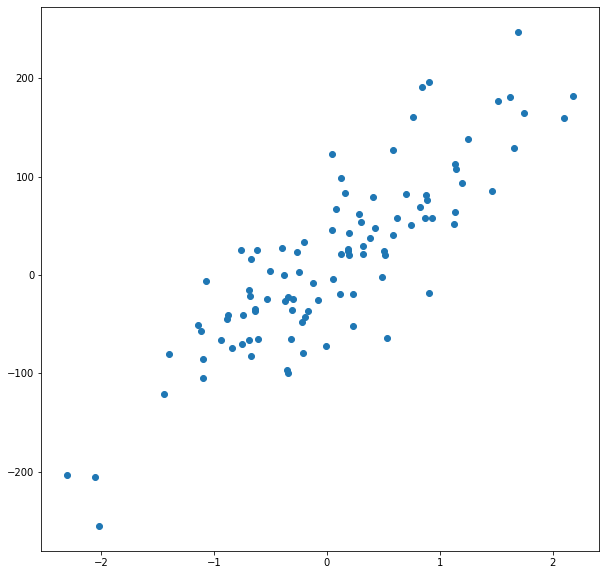

In [8]:
plt.figure(figsize=(10,10), facecolor='w')
plt.scatter(X,y)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred=lr.predict(X)

In [12]:
pred[:10]

array([ -41.95321474,  -11.0976856 ,   51.73017859,   75.01687119,
        139.5405874 ,   42.28291757,   53.80872201,  -47.01849461,
       -108.77026334,   37.00995752])

In [13]:
y[:10]

array([-64.78371502,   3.53525698,  -2.24930988, 160.48684461,
       176.84608642,  37.51202841,  20.43992899,  16.54751235,
       -80.02993193,  21.29508769])

In [17]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y, pred)
r2=r2_score(y, pred)
rmse=np.sqrt(mse)  # rmse는 별도의 함수가 없으므로 numpy.sqrt 함수를 이용한다
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:2078.5472792307764, rmse:45.59108771712709, r2:0.7321024057172182


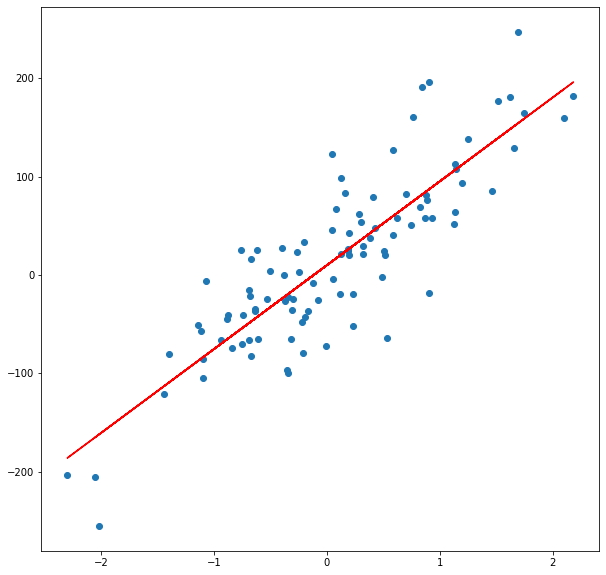

In [19]:
plt.figure(figsize=(10,10), facecolor='w')
plt.scatter(X,y)
plt.plot(X, pred, color='red')
plt.show()

In [21]:
# 기울기(가중치 - 회귀계수)
coef=lr.coef_
# 절편 (편향)
intercept=lr.intercept_

In [22]:
coef, intercept

(array([85.14546889]), 10.135071944054275)

## 기존 분류 모델의 회귀 모델

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor

In [25]:
knn_reg=KNeighborsRegressor(n_neighbors=5)
tree_reg=DecisionTreeRegressor(max_depth=3)
rf_reg=RandomForestRegressor(n_estimators=200, max_depth=2)
gb_reg=GradientBoostingRegressor(n_estimators=200, max_depth=2)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
def print_metrics(y, pred, title=None):
    mse=mean_squared_error(y, pred)
    r2=r2_score(y, pred)
    rmse=np.sqrt(mse)  # rmse는 별도의 함수가 없으므로 numpy.sqrt 함수를 이용한다
    if title:
        print(title)
    print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

In [26]:
knn_reg.fit(X,y)
tree_reg.fit(X,y)
rf_reg.fit(X,y)
gb_reg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
pred_knn=knn_reg.predict(X)
print_metrics(y, pred_knn, "KNN")  # "KNN"은 title

KNN
mse:1553.7262411960573, rmse:39.41733427308419, r2:0.7997449823010551


In [31]:
pred_tree=tree_reg.predict(X)
print_metrics(y, pred_tree, "Tree")

Tree
mse:1468.0010662166815, rmse:38.31450203534794, r2:0.8107938376126091


In [32]:
pred_rf=rf_reg.predict(X)
print_metrics(y, pred_rf, "Random Forest")

Random Forest
mse:1756.735659602524, rmse:41.91343053965547, r2:0.7735797199799757


In [34]:
pred_gb=gb_reg.predict(X)
print_metrics(y, pred_gb, "Gradient Boosting")

Gradient Boosting
mse:371.86574604547985, rmse:19.283820836273083, r2:0.9520713626496753


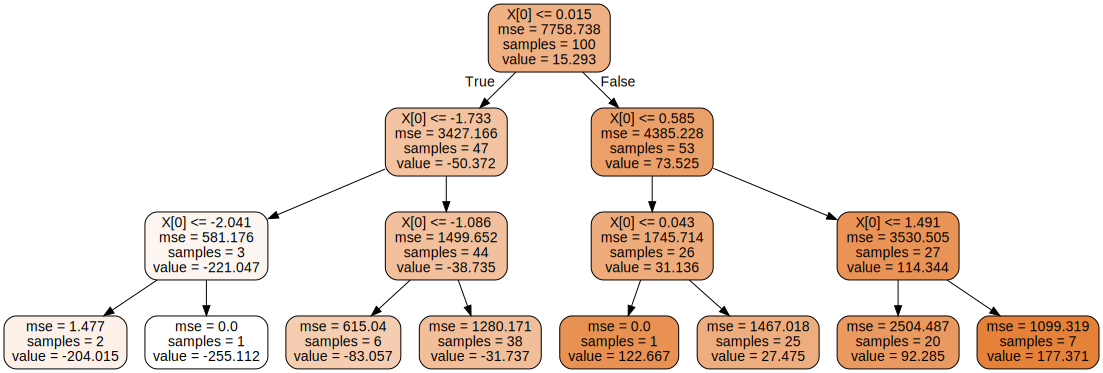

In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph=Source(export_graphviz(tree_reg,
                            out_file=None,
                            rounded=True,
                            filled=True))
display(SVG(graph.pipe(format='svg')))